In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from Functions.crc import *
from preambules_list import preambule_list, Preambule
from approximations_list import Approximation, approximation_strings
from Functions.utils import calc_mse
import scipy.stats as stats
from tabulate import tabulate

stat_data = np.load('python_simulations.npz')

loaded_test_amplitudes = stat_data['test_amplitudes']               #[amplitude step]
loaded_all_energies = stat_data['all_energies']                     #[preamble, amplitude step, generations]
loaded_all_points = stat_data['all_points']                         #[preamble, amplitude step, generations]
loaded_mean_energies = stat_data['mean_energies']                   #[preamble, amplitude step]
loaded_mean_points = stat_data['mean_points']                       #[preamble, amplitude step]
loaded_lower_quantile_points = stat_data['lower_quantile_points']   #[preamble, amplitude step]
loaded_higher_quantile_points = stat_data['higher_quantile_points'] #[preamble, amplitude step]

In [ ]:
param_table = [["Std deviation"], ["Mean"]]
param_table_headers = ["Preambles"]
for preamble_i in range(len(preambule_list)):
    preamble = preambule_list[preamble_i]
    data = loaded_all_points[preamble_i, 1, :] #TODO: 1 hardcoded here
    std_dev = np.std(data)
    mean = np.mean(data)
    # Create table data
    param_table[0].append(std_dev)
    param_table[1].append(mean)
    param_table_headers.append(preamble.get_name())
    # Create plots
    plt.figure()
    plt.subplot(211)
    plt.hist(data, bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of correlation result of preamble {preamble.get_name()}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f"Mean")
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label='Std Dev')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1)
    plt.legend()
    plt.subplot(212)
    stats.probplot(data, dist="norm", plot=plt)
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.title(f"Q-Q plot of preamble {preamble.get_name()}")
    plt.tight_layout()
    plt.show()
    # print(f"Std Deviation: {std_dev:.2f}")
    # print(f"Mean: {mean:.2f}")

print(tabulate(param_table, param_table_headers, tablefmt="grid"))

In [ ]:
for preamble_i in range(len(preambule_list)):
    plt.figure()
    plt.scatter(loaded_all_energies[preamble_i, :, :], loaded_all_points[preamble_i, :, :], marker='o', color='red', label="All points")
    plt.scatter(loaded_mean_energies[preamble_i, :], loaded_mean_points[preamble_i, :], marker='o', color='orange', label="Mean points")
    plt.scatter(loaded_mean_energies[preamble_i, :], loaded_lower_quantile_points[preamble_i, :], marker='o', color='yellow', label="0.25 quantile points")
    plt.scatter(loaded_mean_energies[preamble_i, :], loaded_higher_quantile_points[preamble_i, :], marker='o', color='green', label="0.75 quantile points")
    plt.xlabel('Energy')
    plt.ylabel('Correlation amplitude of preamble detection point')
    plt.title(f"Generated energy values for preamble: {preambule_list[preamble_i].get_name()}")
    plt.legend()
    plt.show()

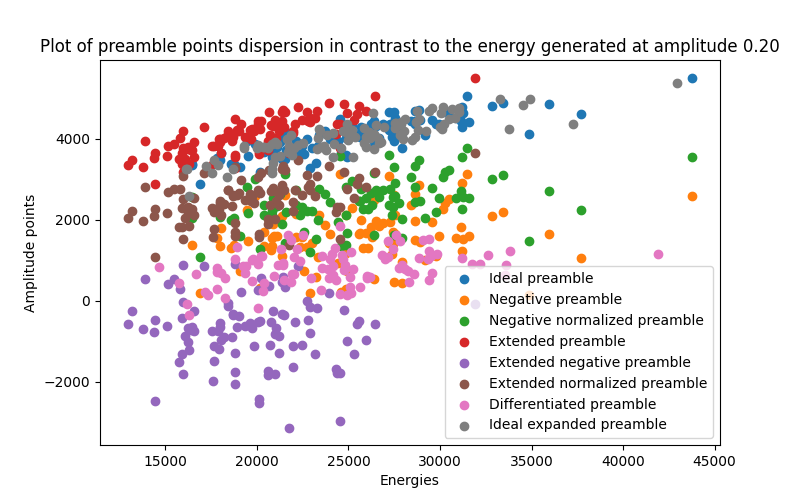

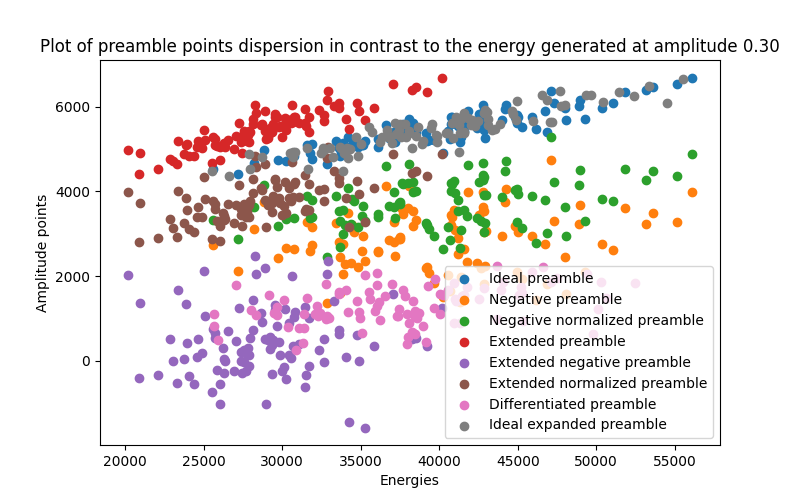

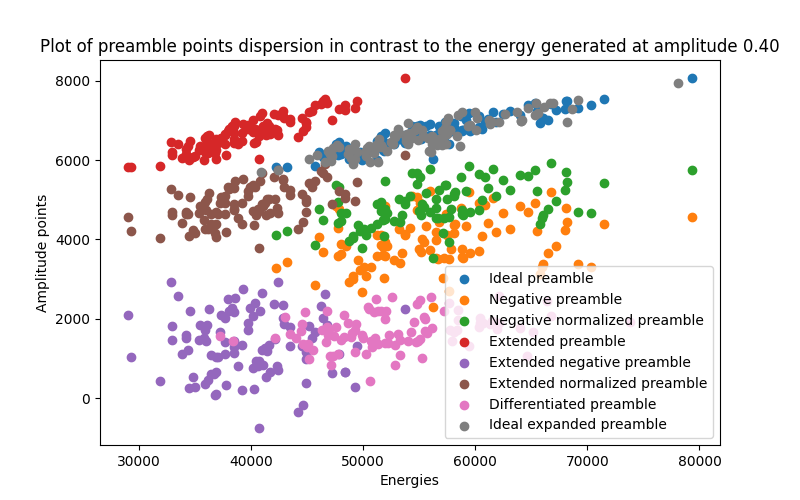

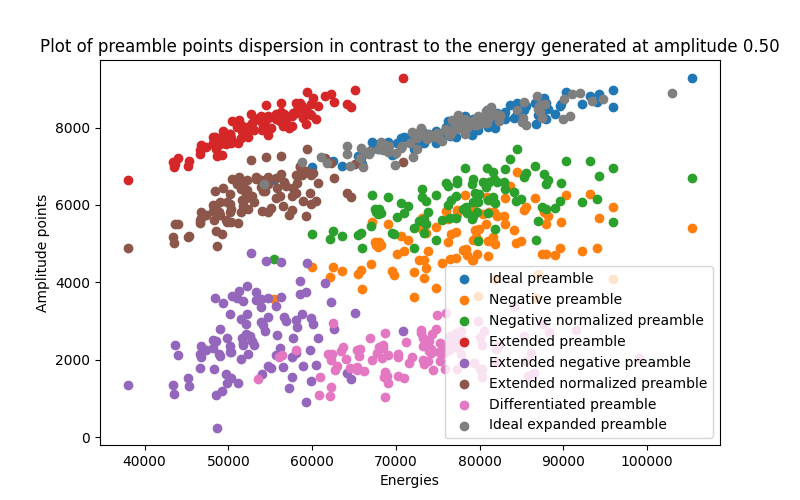

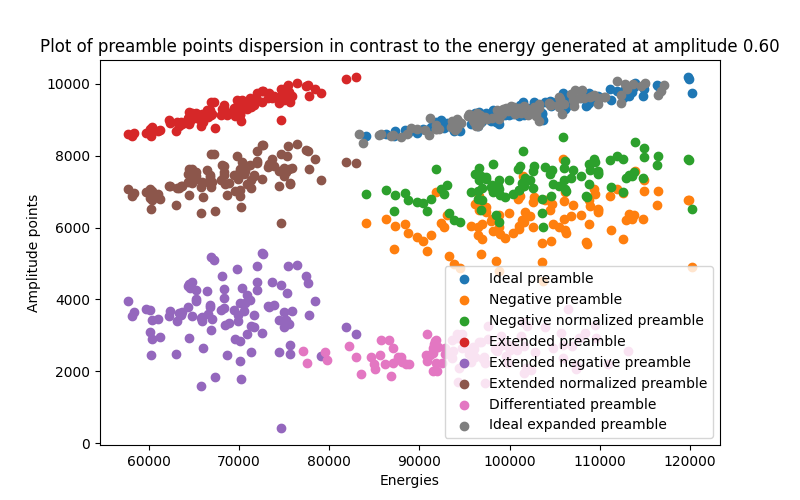

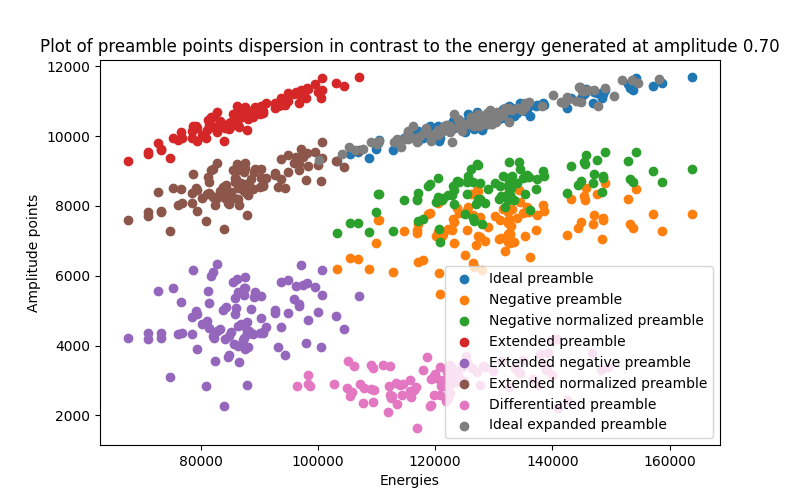

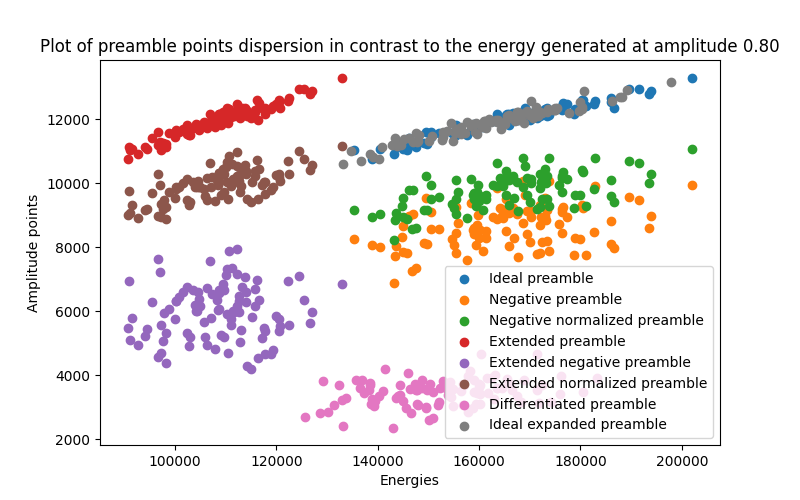

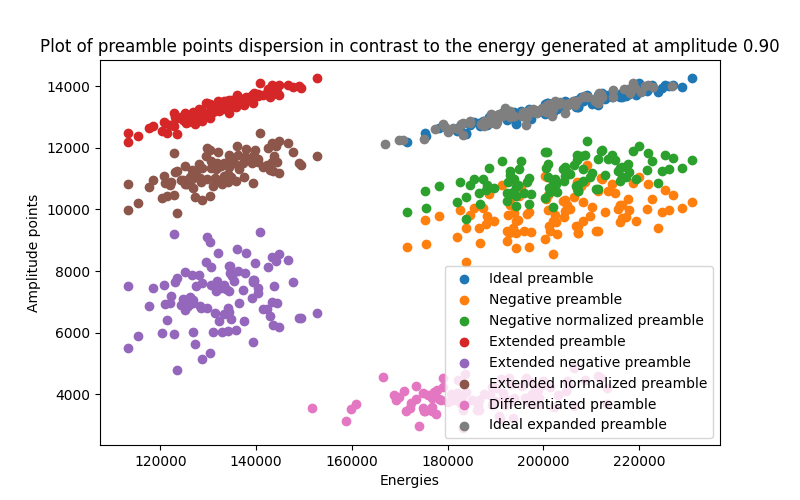

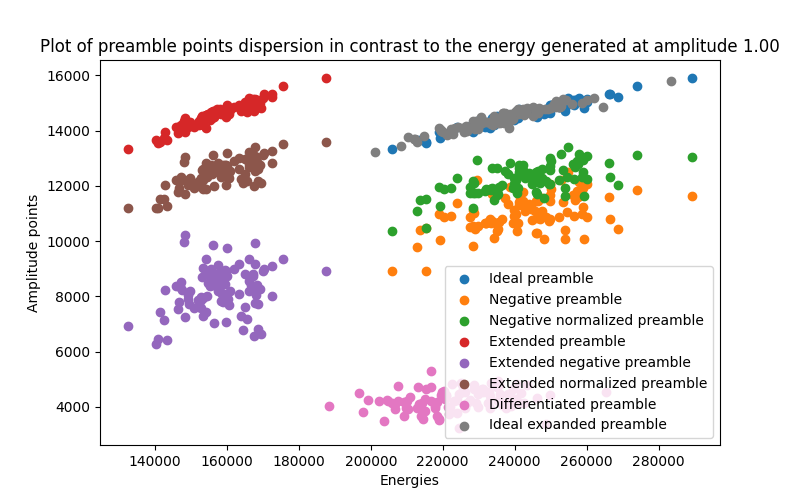

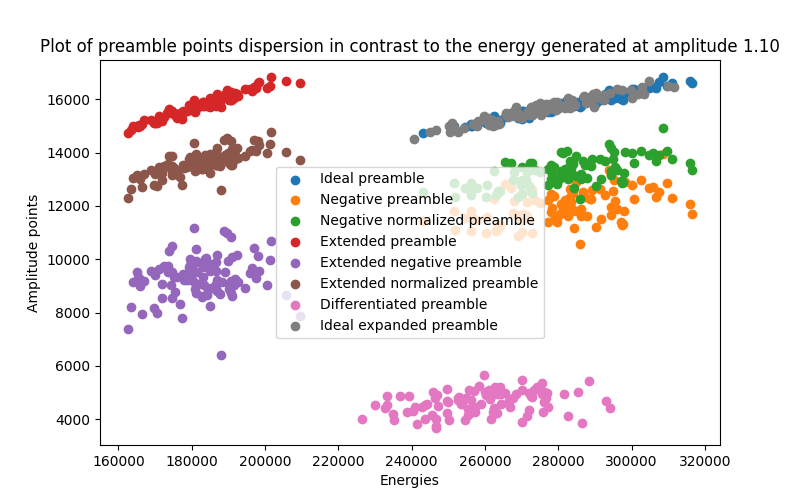

+------------------------+---------+------------+-----------------------+------------+---------------------+-----------------------+------------------+------------------+
|   Preambles/Amplitudes |   Ideal |   Negative |   Negative normalized |   Extended |   Extended negative |   Extended normalized |   Differentiated |   Ideal expanded |
+========================+=========+============+=======================+============+=====================+=======================+==================+==================+
|                    0.2 |   0.848 |      0.209 |                 0.399 |      0.787 |              -0.097 |                 0.432 |            0.348 |            0.856 |
+------------------------+---------+------------+-----------------------+------------+---------------------+-----------------------+------------------+------------------+
|                    0.3 |   0.902 |      0.147 |                 0.365 |      0.879 |               0.058 |                 0.573 |            0

In [11]:
corr_coef_table_data = []
corr_coef_table_headers = ["Preambles/Amplitudes"]
for amplitude_i in range(len(loaded_test_amplitudes)):
    plt.figure(figsize=(8,5))
    corr_coef_table_data_part = [f"{loaded_test_amplitudes[amplitude_i]:.3f}"]
    for preambule_i in range(len(preambule_list)):
        preamble = preambule_list[preambule_i]
        corr_coef = np.corrcoef(loaded_all_energies[preambule_i, amplitude_i, :], loaded_all_points[preambule_i, amplitude_i, :])
        # print("Preamble " + preambule_list[preambule_i].get_name() + " correlation coef: " + str(corr_coef[1][0]))
        if amplitude_i == 0:
            corr_coef_table_headers.append(preamble.get_name())
        corr_coef_table_data_part.append(f"{corr_coef[1][0]:.3f}")
        plt.scatter(loaded_all_energies[preambule_i, amplitude_i, :], loaded_all_points[preambule_i, amplitude_i, :], label = f"{preambule_list[preambule_i].get_name()} preamble")
    plt.xlabel('Energies')
    plt.ylabel('Amplitude points')
    plt.title(f"Plot of preamble points dispersion in contrast to the energy generated at amplitude {loaded_test_amplitudes[amplitude_i]:.2f}", wrap=True)
    plt.legend()
    plt.autoscale()
    plt.show()
    corr_coef_table_data.append(corr_coef_table_data_part)
print(tabulate(corr_coef_table_data, corr_coef_table_headers, tablefmt="grid"))

In [ ]:
approximation_value_table = [
    loaded_lower_quantile_points,
    loaded_mean_points,
    loaded_higher_quantile_points
]

# Polynomial fitting
poly_degree = 2
all_poly_coeffs = np.zeros((int(list(Preambule)[-1].value + 1), int(list(Approximation)[-1].value + 1), poly_degree + 1))
for preambule_i in range(Preambule.Last.value):
    for approximation_i in range(Approximation.Last.value):
        points = approximation_value_table[approximation_i][preambule_i, :]
        # points = loaded_mean_points[preambule_i, :]
        energy = loaded_mean_energies[preambule_i, :]
        poly_coeff =  np.polyfit(energy, points, poly_degree)
        all_poly_coeffs[preambule_i, approximation_i, :] = poly_coeff
        approx_y = np.polyval(poly_coeff, energy)
        mse = calc_mse(approx_y, points)
        # Plotting apprixmation and real curves
        plt.figure()
        plt.plot(energy, points, label = "Real")
        plt.plot(energy, approx_y, label = "Approximation")
        plt.title("Approximation of " + preambule_list[preambule_i].get_name() + " preamble with "
                  + approximation_strings[approximation_i] + " points")
        plt.xlabel("Energy")
        plt.ylabel("Correlation amplitude")
        plt.legend()
        plt.show()

        print(f"MSE: {mse:.2f}")

np.savez('python_approximations.npz', all_poly_coeffs=all_poly_coeffs)